# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session(user_content_storage="./content", port=55707)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Equestria Amino for MLP,SOCIAL,Social,1.8.19106,4.8,8369.0,63000000.0,50000.0,Free,0.0,Teen,"July 13, 2018",4.0.3 and up
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.0,Everyone,"May 8, 2018",4.4 and up
Ek Maratha,SOCIAL,Social,7.5.3,4.8,725.0,3700000.0,10000.0,Free,0.0,Teen,"October 12, 2016",2.2 and up
Metal Detector Pro 2015,TOOLS,Tools,1.1,3.6,1166.0,350000.0,100000.0,Free,0.0,Everyone,"March 30, 2015",4.0 and up
Google Korean Input,TOOLS,Tools,Varies with device,3.5,74819.0,<NA>,100000000.0,Free,0.0,Everyone,"June 25, 2018",7.1 and up


In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

```mermaid
erDiagram
  "playstore" {
    _ String PK "App"
    _ String PK "Category"
    nullable double "Rating"
    nullable float "Reviews"
    nullable double "Size"
    nullable float "Installs"
    _ String "Type"
    nullable double "Price"
    _ String "Content Rating"
    _ String PK "Genres"
    _ String "Last Updated"
    _ String PK "Current Ver"
    _ String "Android Ver"
  }
```


### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

In [4]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x132934c10>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x13292d4d0>, 'Size.MEAN': <atoti.measure.Measure object at 0x1329348d0>, 'Size.SUM': <atoti.measure.Measure object at 0x132934cd0>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x132935850>, 'Reviews.SUM': <atoti.measure.Measure object at 0x132935890>, 'Installs.MEAN': <atoti.measure.Measure object at 0x1329358d0>, 'Installs.SUM': <atoti.measure.Measure object at 0x132935910>, 'Rating.MEAN': <atoti.measure.Measure object at 0x132935950>, 'Rating.SUM': <atoti.measure.Measure object at 0x132935990>, 'Price.MEAN': <atoti.measure.Measure object at 0x1329359d0>, 'Price.SUM': <atoti.measure.Measure object at 0x132935a10>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

In [7]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

In [8]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x132942910>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x132938a10>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x132938750>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x13296d4d0>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x13296d110>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x13296d410>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x13296cf50>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x13296ccd0>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x13296cd90>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

In [10]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
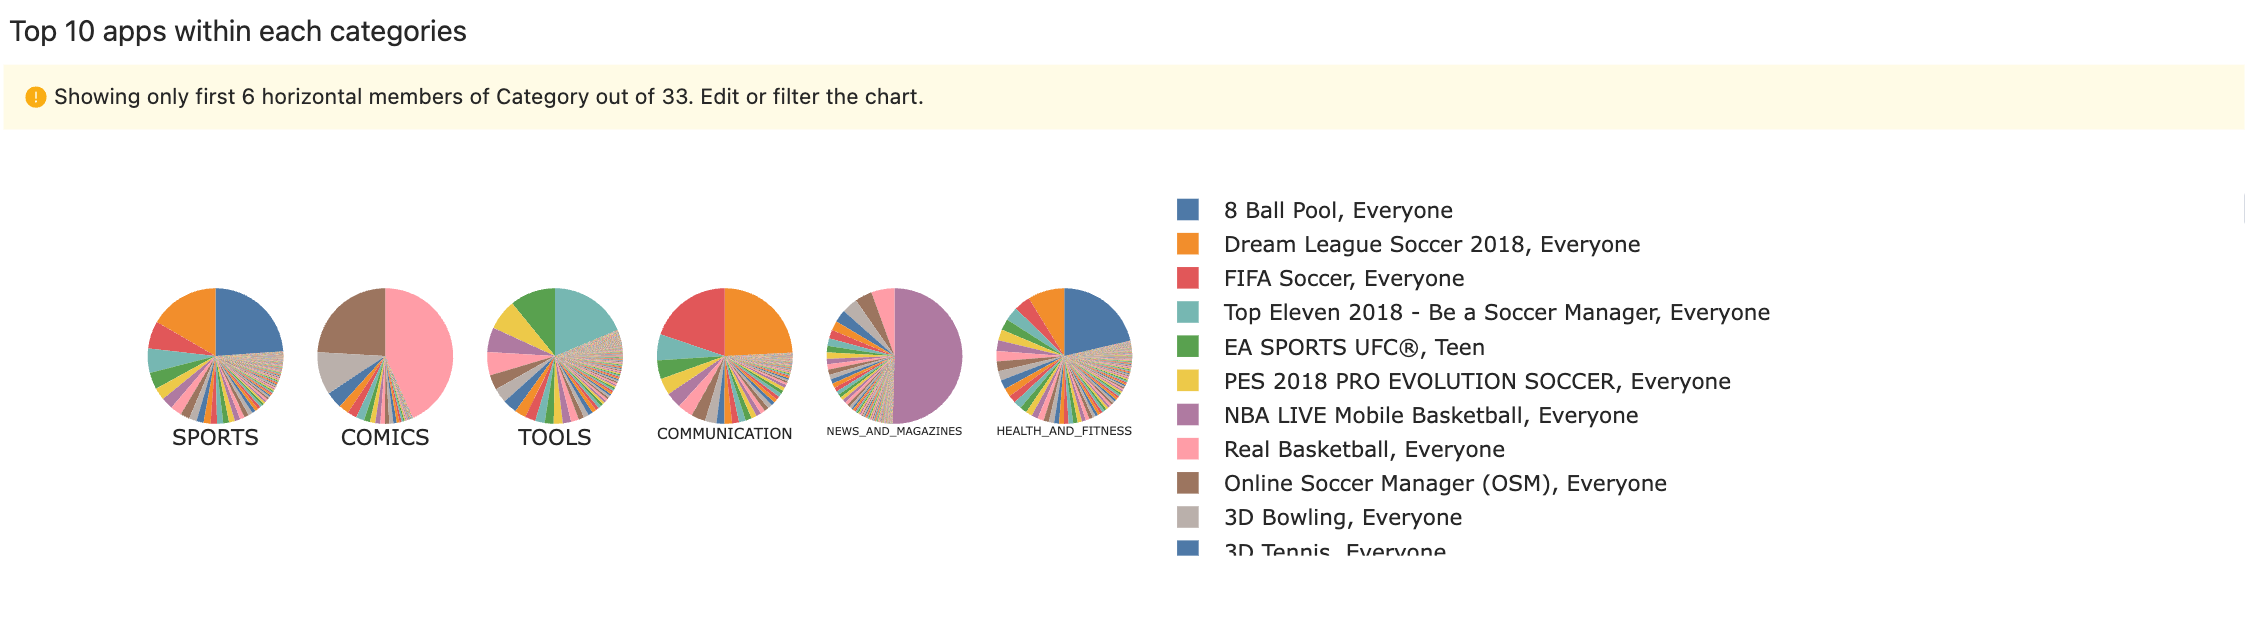

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55707/#/dashboard/767

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>